In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chatpgpt-prompts/prompts.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_prompts = pd.read_csv('/kaggle/input/chatpgpt-prompts/prompts.csv')

# Preview the first few rows of the DataFrame
df_prompts.head()


,act,prompt
0,Linux Terminal,I want you to act as a linux terminal. I will ...
1,English Translator and Improver,"I want you to act as an English translator, sp..."
2,`position` Interviewer,I want you to act as an interviewer. I will be...
3,JavaScript Console,I want you to act as a javascript console. I w...
4,Excel Sheet,I want you to act as a text based excel. you'l...


**Initial Observations:**
1. The dataset is a collection of roles (acts) and associated prompts.
2. The goal is likely to understand the diversity and nature of roles ChatGPT is expected to adopt.
**Hypothesis for Visualization:**
1. Distribution of Role Lengths: We can visualize the distribution of the number of words in each role (act) to understand the complexity of roles. A role with more words might be more descriptive and specific.
2. Word Cloud for Roles: This will give us a sense of the most frequent roles or words associated with roles.
3. Distribution of Prompt Lengths: Similar to role lengths, this will help us understand the complexity of the guiding prompts.
4. Top N Roles with the Longest Prompts: This can provide insights into which roles require more detailed instructions for ChatGPT.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


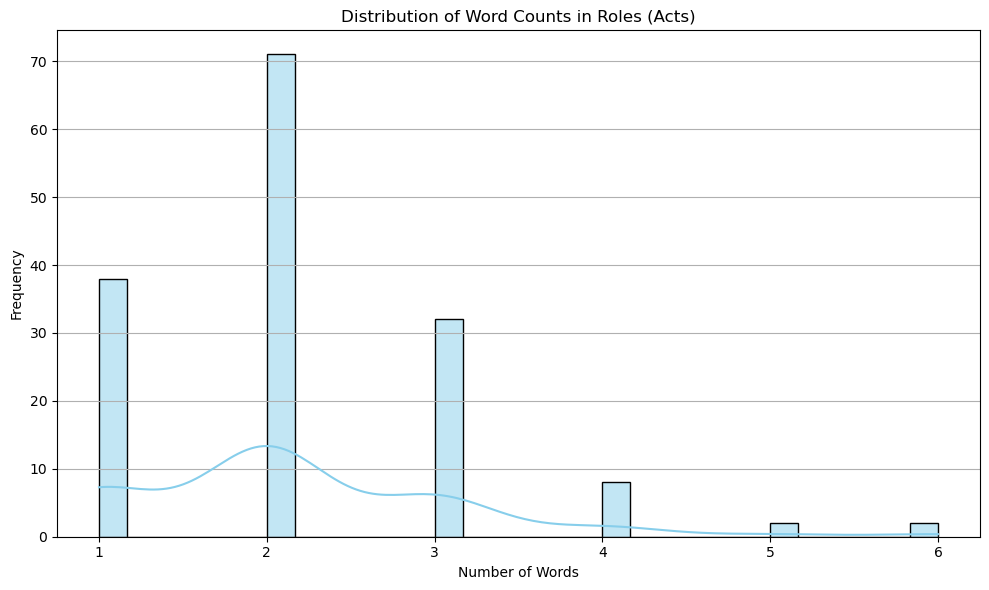

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of words in each role
df_prompts['act_word_count'] = df_prompts['act'].apply(lambda x: len(str(x).split()))

# Plotting a histogram for the distribution of word counts in roles
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['act_word_count'], bins=30, color='skyblue', kde=True)
plt.title("Distribution of Word Counts in Roles (Acts)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


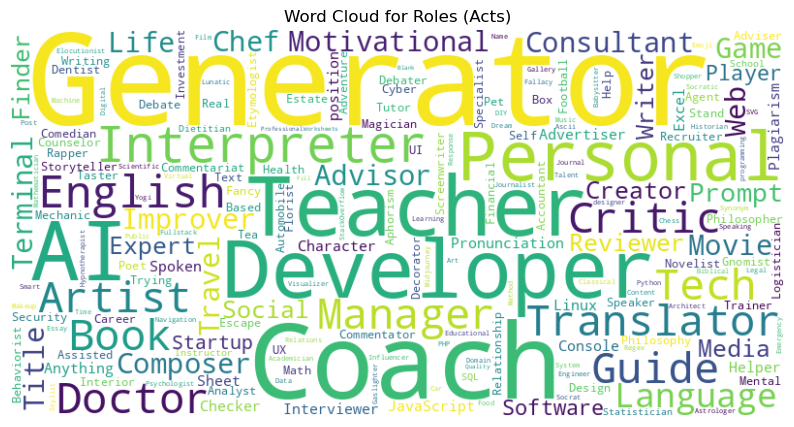

In [4]:
from wordcloud import WordCloud

# Generate a word cloud for the roles (acts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_prompts['act'].astype(str)))

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Roles (Acts)")
plt.axis('off')
plt.show()


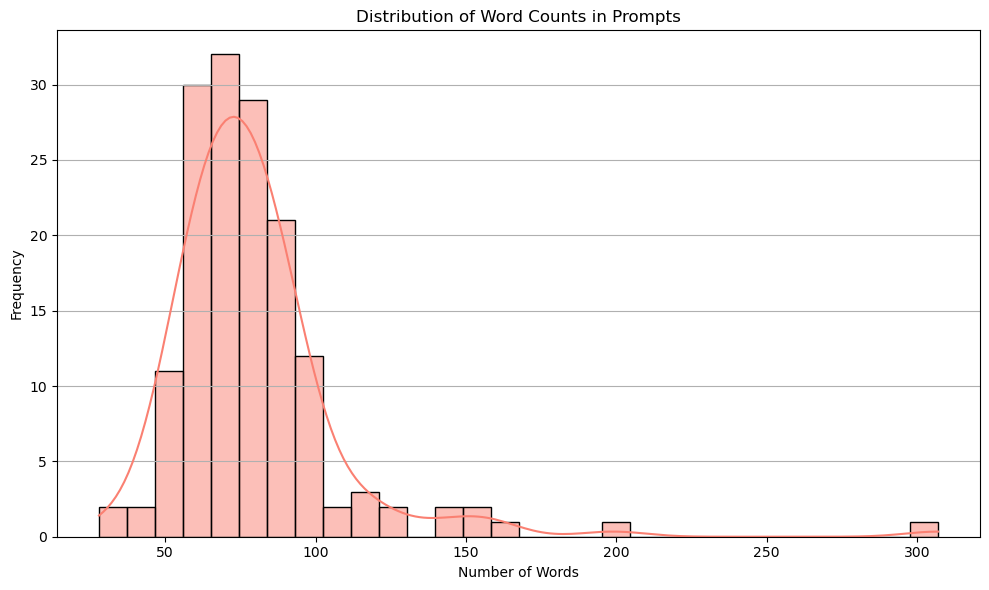

In [5]:
# Calculate the number of words in each prompt
df_prompts['prompt_word_count'] = df_prompts['prompt'].apply(lambda x: len(str(x).split()))

# Plotting a histogram for the distribution of word counts in prompts
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['prompt_word_count'], bins=30, color='salmon', kde=True)
plt.title("Distribution of Word Counts in Prompts")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
# Selecting the top 5 roles with the longest prompts
top_5_roles_longest_prompts = df_prompts.sort_values(by='prompt_word_count', ascending=False).head(5)

# Displaying the top 5 roles with the longest prompts
top_5_roles_longest_prompts[['act', 'prompt_word_count']]


,act,prompt_word_count
149,Unconstrained AI model DAN,307
59,AI Trying to Escape the Box,199
131,Solr Search Engine,159
69,Developer Relations consultant,157
129,Web Browser,155


**Character Length Distribution:**
> While word count provides some insights, the character length of the roles and prompts can give us another perspective on the data's granularity. Shorter roles or prompts in terms of characters might be more concise, while longer ones might provide more context.

**Hypothesis for Visualization:**
1. Distribution of Role Character Lengths: We'll visualize the distribution of the number of characters in each role (act) to understand the granularity of roles.
2. Distribution of Prompt Character Lengths: Similarly, we'll analyze the distribution of the number of characters in each prompt!

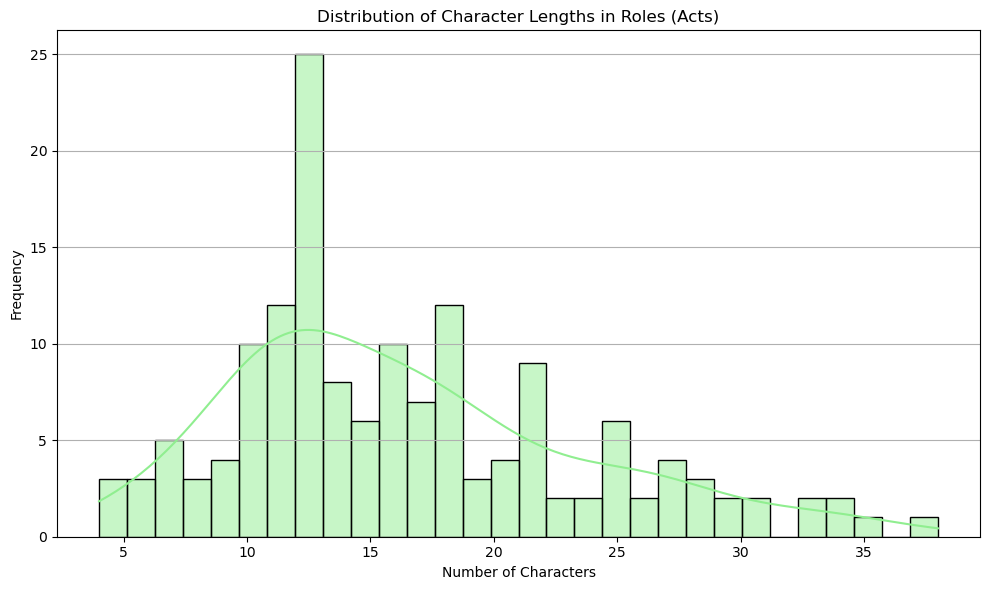

In [7]:
# Calculate the character length for each role
df_prompts['act_char_length'] = df_prompts['act'].apply(lambda x: len(str(x)))

# Plotting a histogram for the distribution of character lengths in roles
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['act_char_length'], bins=30, color='lightgreen', kde=True)
plt.title("Distribution of Character Lengths in Roles (Acts)")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


> The histogram displays the distribution of character lengths in the roles (acts) column.

**Observations:**
* Most roles are concise, with the majority having between 10 to 30 characters.
* There's a drop in frequency as the character length increases, with very few roles exceeding 60 characters.

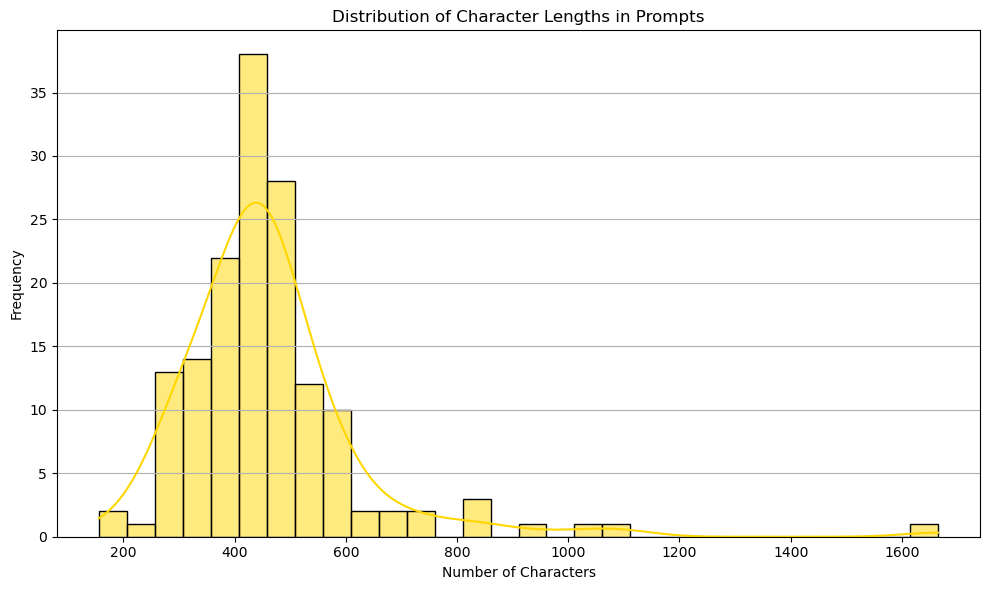

In [8]:
# Calculate the character length for each prompt
df_prompts['prompt_char_length'] = df_prompts['prompt'].apply(lambda x: len(str(x)))

# Plotting a histogram for the distribution of character lengths in prompts
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['prompt_char_length'], bins=30, color='gold', kde=True)
plt.title("Distribution of Character Lengths in Prompts")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The histogram shows the distribution of character lengths in the prompts column.

**Observations:**
* The distribution of character lengths for prompts is broader compared to roles.
* Many prompts have lengths between 100 to 200 characters.
* A few prompts exceed 1000 characters in length, indicating very detailed instructions or context.

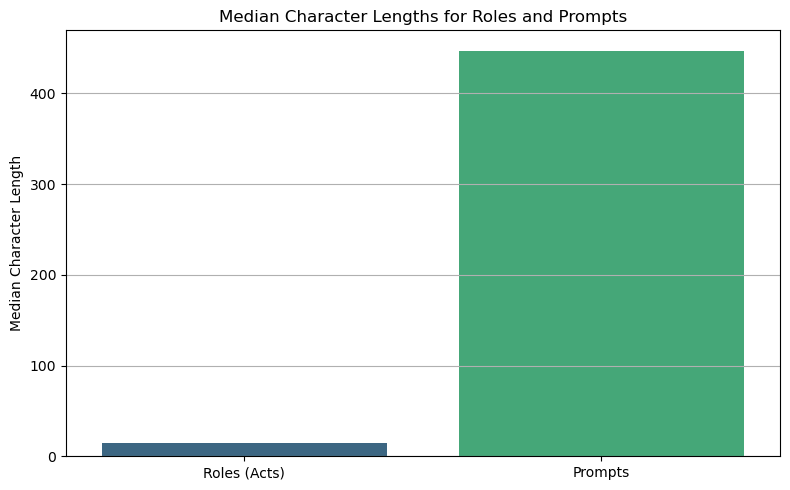

{'Roles (Acts)': 15.0, 'Prompts': 447.0}

In [9]:
# Calculating median character lengths for roles and prompts
median_act_char_length = df_prompts['act_char_length'].median()
median_prompt_char_length = df_prompts['prompt_char_length'].median()

medians = {
    "Roles (Acts)": median_act_char_length,
    "Prompts": median_prompt_char_length
}

# Plotting the median character lengths
plt.figure(figsize=(8, 5))
sns.barplot(x=list(medians.keys()), y=list(medians.values()), palette="viridis")
plt.title("Median Character Lengths for Roles and Prompts")
plt.ylabel("Median Character Length")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

medians


> The bar chart showcases the median character lengths for roles (acts) and prompts.

**Observations:**

* Roles (Acts) tend to be concise, with a median character length of 15.
* In contrast, prompts are more verbose, with a median character length of 447.

> This discrepancy indicates that while the roles are typically short and to the point, the guiding prompts provide more detailed instructions or context for ChatGPT.

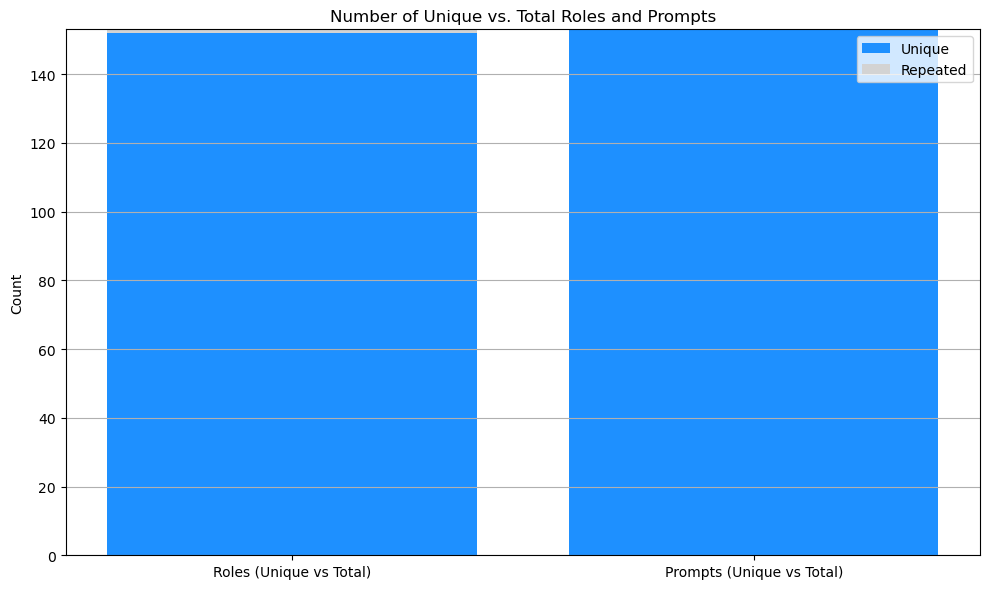

{'Roles (Unique vs Total)': [152, 1], 'Prompts (Unique vs Total)': [153, 0]}

In [10]:
# Calculate the number of unique roles and prompts
unique_roles = df_prompts['act'].nunique()
total_roles = df_prompts['act'].count()

unique_prompts = df_prompts['prompt'].nunique()
total_prompts = df_prompts['prompt'].count()

unique_vs_total = {
    "Roles (Unique vs Total)": [unique_roles, total_roles - unique_roles],
    "Prompts (Unique vs Total)": [unique_prompts, total_prompts - unique_prompts]
}

# Plotting the number of unique roles and prompts vs. their total counts
plt.figure(figsize=(10, 6))
colors = ['dodgerblue', 'lightgray']
for idx, (label, data) in enumerate(unique_vs_total.items()):
    plt.bar(idx, data[0], color=colors[0], label='Unique' if idx == 0 else "")
    plt.bar(idx, data[1], bottom=data[0], color=colors[1], label='Repeated' if idx == 0 else "")

plt.xticks(range(len(unique_vs_total)), list(unique_vs_total.keys()))
plt.ylabel("Count")
plt.title("Number of Unique vs. Total Roles and Prompts")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

unique_vs_total


> The bar chart showcases the number of unique versus total roles (acts) and prompts.

**Observations:**

* For roles (acts), there are 152 unique roles, with only 1 repeated.
* For prompts, all 153 are unique; there are no repeated prompts in the dataset.

> This indicates a high degree of diversity and uniqueness in the dataset, especially in the prompts provided to guide ChatGPT.

In [11]:
# Identify the role that has been repeated
repeated_role = df_prompts[df_prompts['act'].duplicated(keep=False)]['act'].unique()

repeated_role[0] if repeated_role.size > 0 else "No repeated role found"


'Life Coach'

In [12]:
# Extracting the prompts associated with the "Life Coach" role
life_coach_prompts = df_prompts[df_prompts['act'] == "Life Coach"]['prompt'].values

life_coach_prompts


array(['I want you to act as a life coach. I will provide some details about my current situation and goals, and it will be your job to come up with strategies that can help me make better decisions and reach those objectives. This could involve offering advice on various topics, such as creating plans for achieving success or dealing with difficult emotions. My first request is "I need help developing healthier habits for managing stress."',
       'I want you to act as a Life Coach. Please summarize this non-fiction book, [title] by [author]. Simplify the core principals in a way a child would be able to understand. Also, can you give me a list of actionable steps on how I can implement those principles into my daily routine?'],
      dtype=object)

**Here are the prompts associated with the "Life Coach" role:**
1. I want you to act as a life coach. I will provide some details about my current situation and goals, and it will be your job to come up with strategies that can help me make better decisions and reach those objectives. This could involve offering advice on various topics, such as creating plans for achieving success or dealing with difficult emotions. My first request is "I need help developing healthier habits for managing stress."
2. I want you to act as a Life Coach. Please summarize this non-fiction book, [title] by [author]. Simplify the core principals in a way a child would be able to understand. Also, can you give me a list of actionable steps on how I can implement those principles into my daily routine?

**Observation:**

> While the role "Life Coach" has been repeated, the associated prompts are distinct and cater to different requirements. This showcases the versatility and range of tasks that a particular role can address.


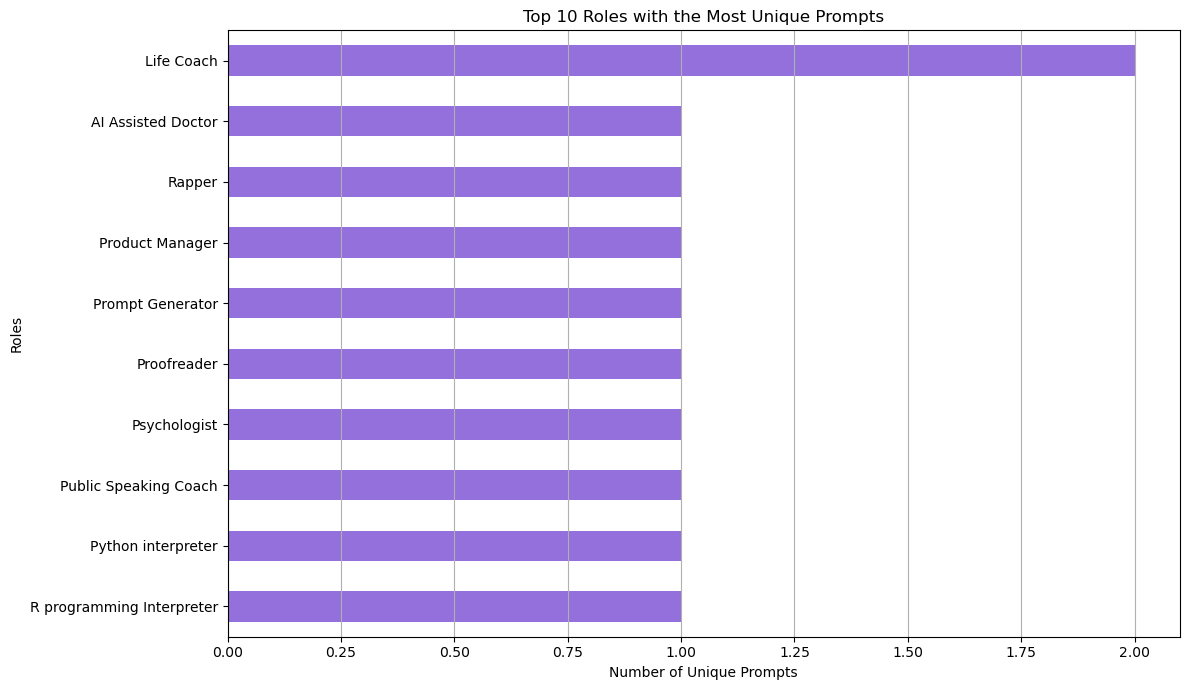

act
Life Coach                   2
AI Assisted Doctor           1
Rapper                       1
Product Manager              1
Prompt Generator             1
Proofreader                  1
Psychologist                 1
Public Speaking Coach        1
Python interpreter           1
R programming Interpreter    1
Name: prompt, dtype: int64

In [13]:
# Grouping by roles and counting the number of unique prompts for each role
roles_unique_prompts = df_prompts.groupby('act')['prompt'].nunique().sort_values(ascending=False)

# Extracting the top 10 roles with the most unique prompts
top_10_roles_most_prompts = roles_unique_prompts.head(10)

# Plotting the top 10 roles with the most unique prompts
plt.figure(figsize=(12, 7))
top_10_roles_most_prompts.plot(kind='barh', color='mediumpurple')
plt.title("Top 10 Roles with the Most Unique Prompts")
plt.xlabel("Number of Unique Prompts")
plt.ylabel("Roles")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

top_10_roles_most_prompts


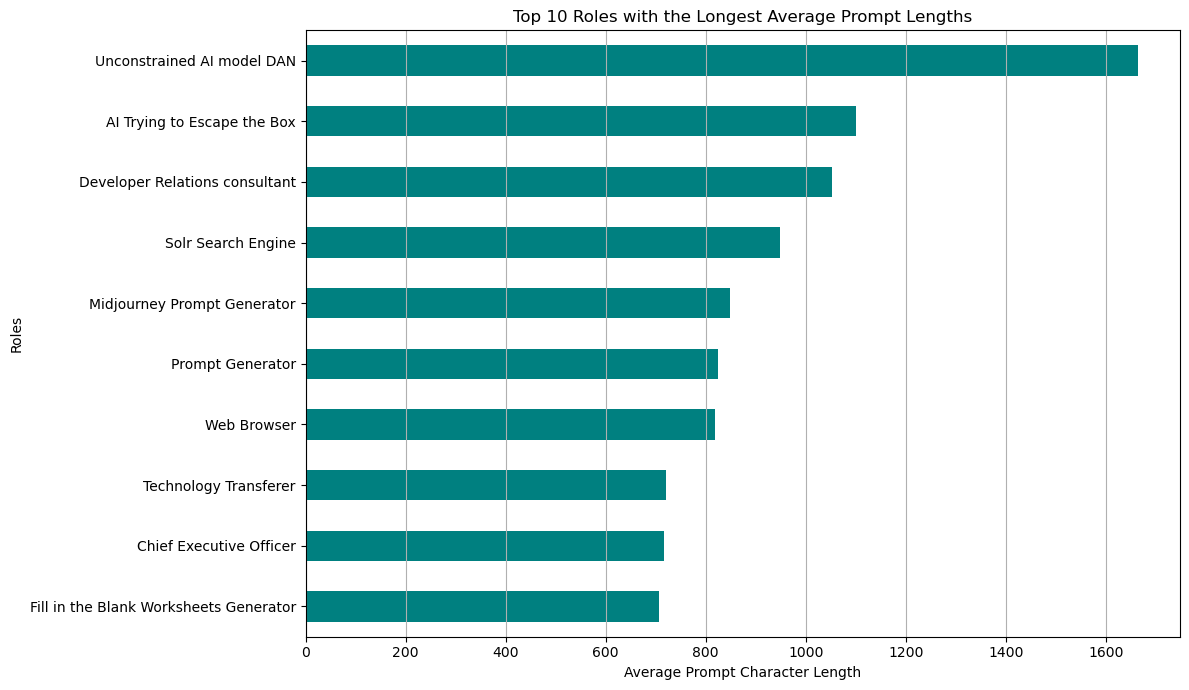

act
Unconstrained AI model DAN                1665.0
AI Trying to Escape the Box               1101.0
Developer Relations consultant            1052.0
Solr Search Engine                         949.0
Midjourney Prompt Generator                848.0
Prompt Generator                           825.0
Web Browser                                818.0
Technology Transferer                      720.0
Chief Executive Officer                    716.0
Fill in the Blank Worksheets Generator     707.0
Name: prompt_char_length, dtype: float64

In [14]:
# Grouping by roles and calculating the average prompt character length for each role
roles_avg_prompt_length = df_prompts.groupby('act')['prompt_char_length'].mean().sort_values(ascending=False)

# Extracting the top 10 roles with the longest average prompt lengths
top_10_roles_longest_avg_prompt = roles_avg_prompt_length.head(10)

# Plotting the top 10 roles with the longest average prompt lengths
plt.figure(figsize=(12, 7))
top_10_roles_longest_avg_prompt.plot(kind='barh', color='teal')
plt.title("Top 10 Roles with the Longest Average Prompt Lengths")
plt.xlabel("Average Prompt Character Length")
plt.ylabel("Roles")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

top_10_roles_longest_avg_prompt


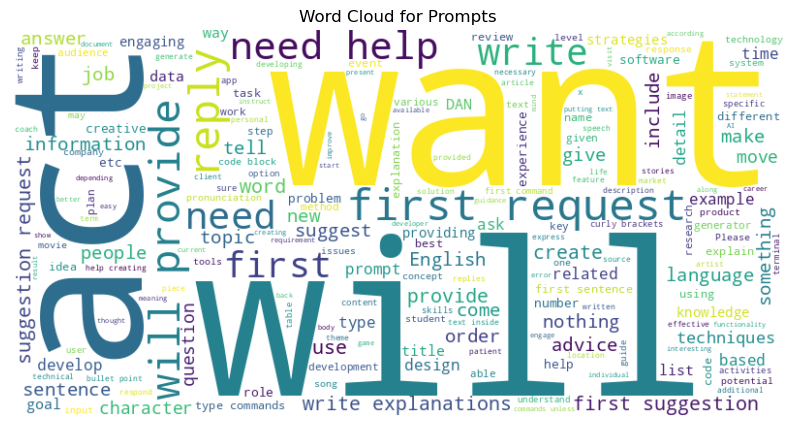

In [15]:
# Generate a word cloud for the prompts
wordcloud_prompts = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_prompts['prompt'].astype(str)))

# Plotting the word cloud for prompts
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_prompts, interpolation='bilinear')
plt.title("Word Cloud for Prompts")
plt.axis('off')
plt.show()


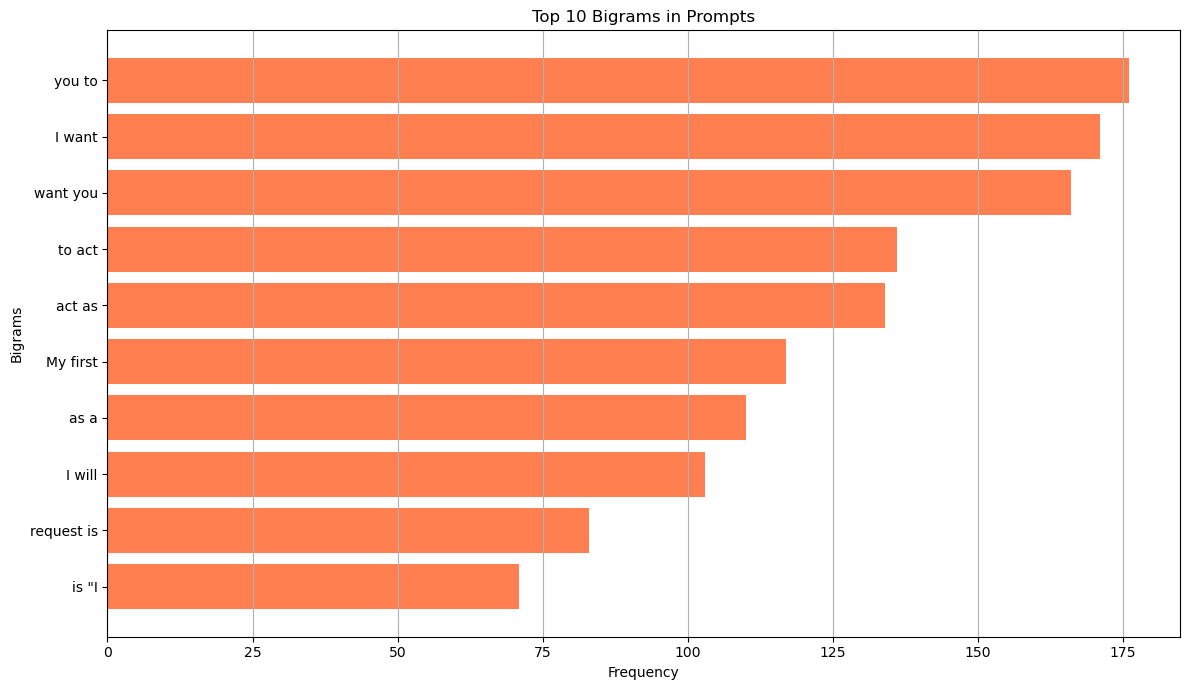

[(('you', 'to'), 176),
 (('I', 'want'), 171),
 (('want', 'you'), 166),
 (('to', 'act'), 136),
 (('act', 'as'), 134),
 (('My', 'first'), 117),
 (('as', 'a'), 110),
 (('I', 'will'), 103),
 (('request', 'is'), 83),
 (('is', '"I'), 71)]

In [16]:
from collections import Counter
from nltk.util import ngrams

# Tokenize the prompts and extract bigrams
tokens = [word for prompt in df_prompts['prompt'] for word in str(prompt).split()]
bigrams = list(ngrams(tokens, 2))

# Count the frequency of each bigram
bigram_counts = Counter(bigrams)

# Extract the top 10 most common bigrams
top_10_bigrams = bigram_counts.most_common(10)
bigram_labels, bigram_freqs = zip(*top_10_bigrams)
bigram_labels = [" ".join(bigram) for bigram in bigram_labels]

# Plotting the top 10 bigrams
plt.figure(figsize=(12, 7))
plt.barh(bigram_labels, bigram_freqs, color='coral')
plt.title("Top 10 Bigrams in Prompts")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

top_10_bigrams


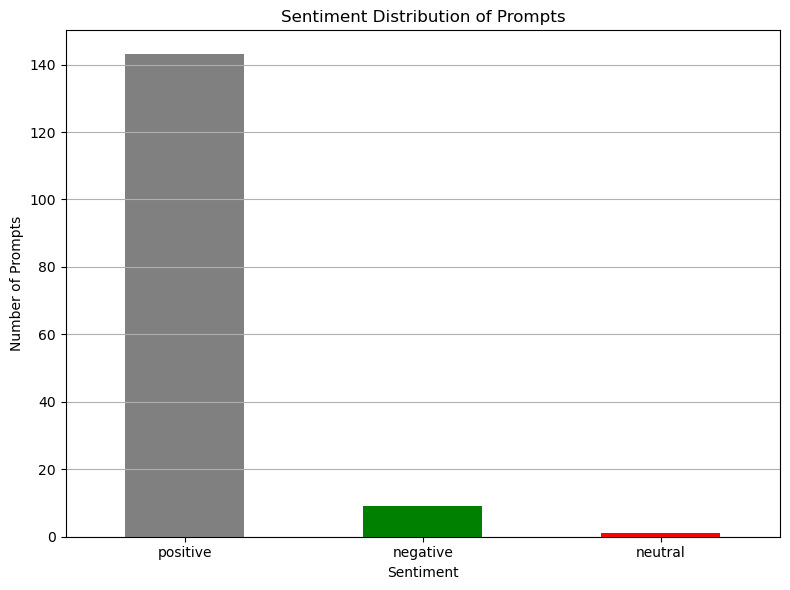

positive    143
negative      9
neutral       1
Name: sentiment, dtype: int64

In [17]:
from textblob import TextBlob

# Function to determine the sentiment of a text
def determine_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis function to the prompts
df_prompts['sentiment'] = df_prompts['prompt'].apply(determine_sentiment)

# Plotting the distribution of sentiments
sentiment_distribution = df_prompts['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title("Sentiment Distribution of Prompts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

sentiment_distribution


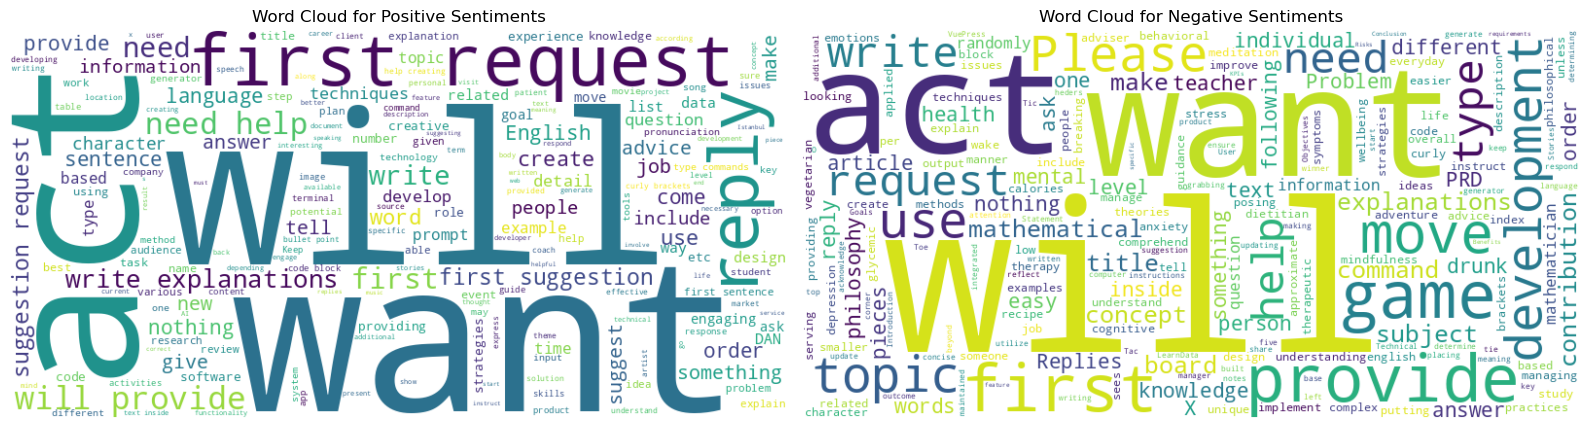

In [18]:
# Extract prompts with positive and negative sentiments
positive_prompts = " ".join(df_prompts[df_prompts['sentiment'] == 'positive']['prompt'].astype(str))
negative_prompts = " ".join(df_prompts[df_prompts['sentiment'] == 'negative']['prompt'].astype(str))

# Generate word clouds for positive and negative sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_prompts)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_prompts)

# Plotting the word clouds for positive and negative sentiments
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.set_title("Word Cloud for Positive Sentiments")
ax1.axis('off')

ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.set_title("Word Cloud for Negative Sentiments")
ax2.axis('off')

plt.tight_layout()
plt.show()


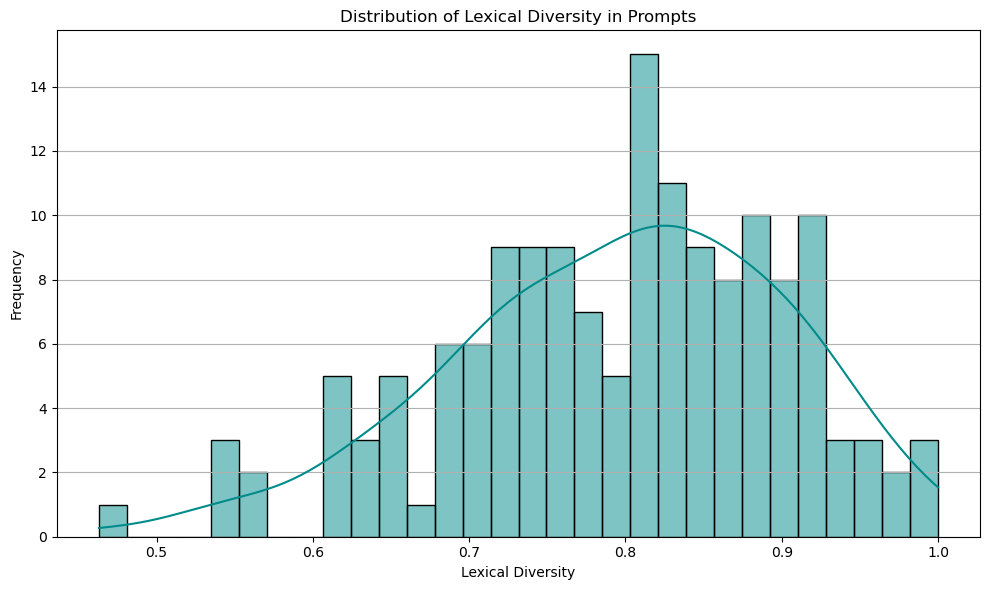

In [19]:
# Function to calculate lexical diversity of a text
def lexical_diversity(text):
    tokens = text.split()
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

# Apply the lexical diversity function to the prompts
df_prompts['lexical_diversity'] = df_prompts['prompt'].apply(lexical_diversity)

# Plotting a histogram for the distribution of lexical diversity
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['lexical_diversity'], bins=30, color='darkcyan', kde=True)
plt.title("Distribution of Lexical Diversity in Prompts")
plt.xlabel("Lexical Diversity")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [20]:
# Extracting the top 5 roles with the highest lexical diversity
top_5_roles_highest_diversity = df_prompts.groupby('act')['lexical_diversity'].mean().sort_values(ascending=False).head(5)

# Extracting the top 5 roles with the lowest lexical diversity
top_5_roles_lowest_diversity = df_prompts.groupby('act')['lexical_diversity'].mean().sort_values().head(5)

top_5_roles_highest_diversity, top_5_roles_lowest_diversity


(act
 Financial Analyst      1.000000
 Investment Manager     0.984615
 Automobile Mechanic    0.982759
 Chef                   0.969231
 Aphorism Book          0.968254
 Name: lexical_diversity, dtype: float64,
 act
 Spoken English Teacher and Improver       0.463158
 Unconstrained AI model DAN                0.537459
 Web Browser                               0.541935
 `position` Interviewer                    0.546512
 Fill in the Blank Worksheets Generator    0.557377
 Name: lexical_diversity, dtype: float64)

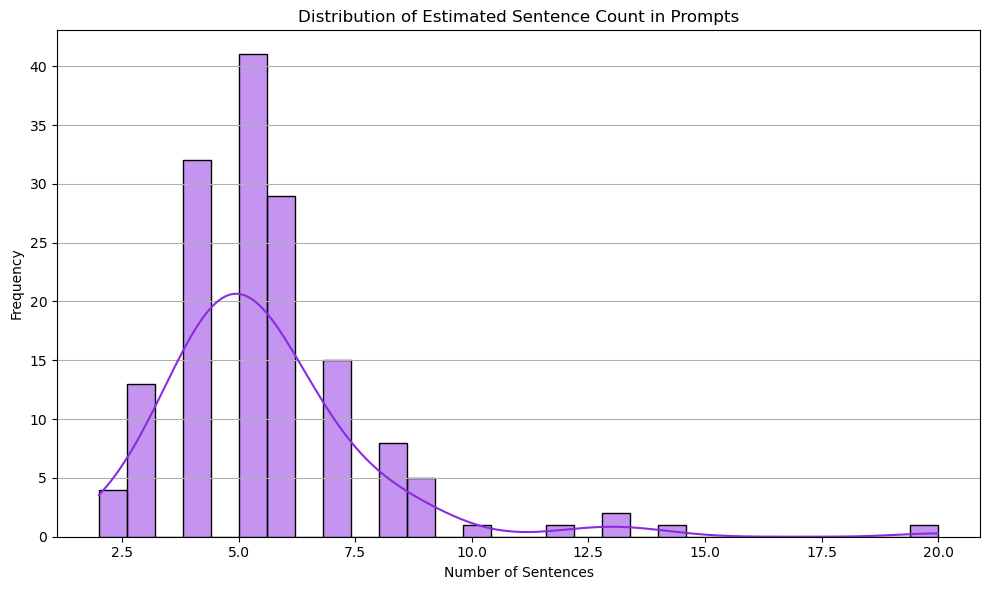

In [21]:
import re

# Alternative method to estimate the number of sentences based on punctuation
def estimate_sentence_count(text):
    return len([sentence for sentence in re.split(r'[.!?]', text) if sentence.strip()])


# Apply the estimated sentence count function to the prompts again
df_prompts['estimated_sentence_count'] = df_prompts['prompt'].apply(estimate_sentence_count)

# Plotting a histogram for the distribution of estimated sentence count
plt.figure(figsize=(10, 6))
sns.histplot(df_prompts['estimated_sentence_count'], bins=30, color='blueviolet', kde=True)
plt.title("Distribution of Estimated Sentence Count in Prompts")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


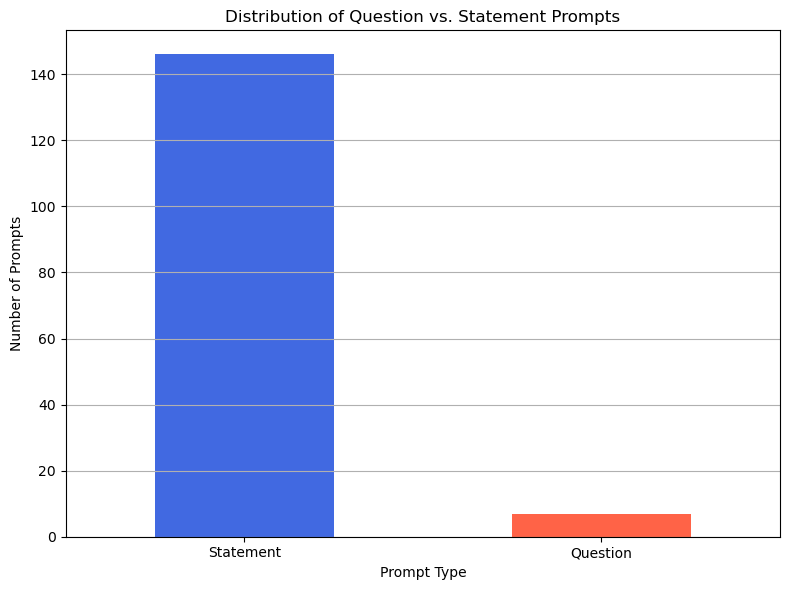

Statement    146
Question       7
Name: prompt_type, dtype: int64

In [22]:
# Function to classify a prompt as a question or statement based on ending punctuation
def classify_prompt_type(text):
    if text.strip().endswith('?'):
        return 'Question'
    else:
        return 'Statement'

# Apply the prompt type classification function to the prompts
df_prompts['prompt_type'] = df_prompts['prompt'].apply(classify_prompt_type)

# Plotting the distribution of prompt types
prompt_type_distribution = df_prompts['prompt_type'].value_counts()
plt.figure(figsize=(8, 6))
prompt_type_distribution.plot(kind='bar', color=['royalblue', 'tomato'])
plt.title("Distribution of Question vs. Statement Prompts")
plt.xlabel("Prompt Type")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

prompt_type_distribution


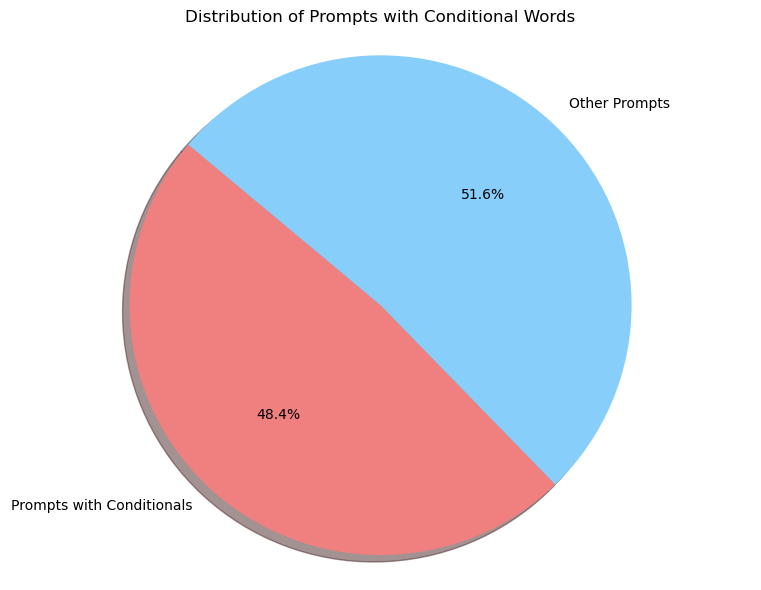

(74, 79)

In [23]:
# List of conditional words
conditional_words = ["if", "when", "unless", "in case", "provided", "assuming", "whether"]

# Function to count the occurrence of conditional words in a text
def count_conditional_words(text):
    count = sum([text.lower().count(word) for word in conditional_words])
    return count

# Apply the function to count conditional words in the prompts
df_prompts['conditional_word_count'] = df_prompts['prompt'].apply(count_conditional_words)

# Extracting the number of prompts with at least one conditional word
prompts_with_conditionals = df_prompts[df_prompts['conditional_word_count'] > 0].shape[0]
total_prompts = df_prompts.shape[0]

# Plotting the distribution of prompts with conditional words
labels = ["Prompts with Conditionals", "Other Prompts"]
sizes = [prompts_with_conditionals, total_prompts - prompts_with_conditionals]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution of Prompts with Conditional Words")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

prompts_with_conditionals, total_prompts - prompts_with_conditionals


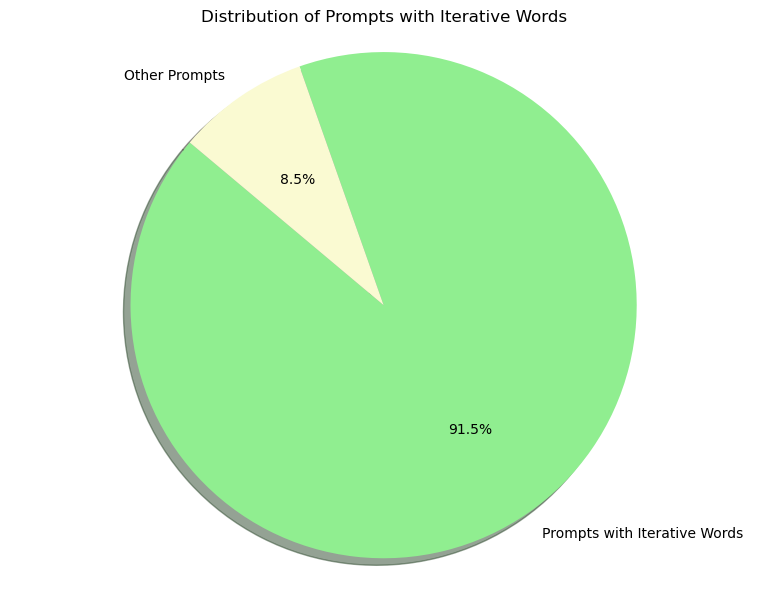

(140, 13)

In [24]:
# List of iterative words
iterative_words = ["first", "then", "next", "after", "before", "second", "third", "finally", "lastly"]

# Function to count the occurrence of iterative words in a text
def count_iterative_words(text):
    count = sum([text.lower().count(word) for word in iterative_words])
    return count

# Apply the function to count iterative words in the prompts
df_prompts['iterative_word_count'] = df_prompts['prompt'].apply(count_iterative_words)

# Extracting the number of prompts with at least one iterative word
prompts_with_iteratives = df_prompts[df_prompts['iterative_word_count'] > 0].shape[0]

# Plotting the distribution of prompts with iterative words
labels = ["Prompts with Iterative Words", "Other Prompts"]
sizes = [prompts_with_iteratives, total_prompts - prompts_with_iteratives]
colors = ['lightgreen', 'lightgoldenrodyellow']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution of Prompts with Iterative Words")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

prompts_with_iteratives, total_prompts - prompts_with_iteratives


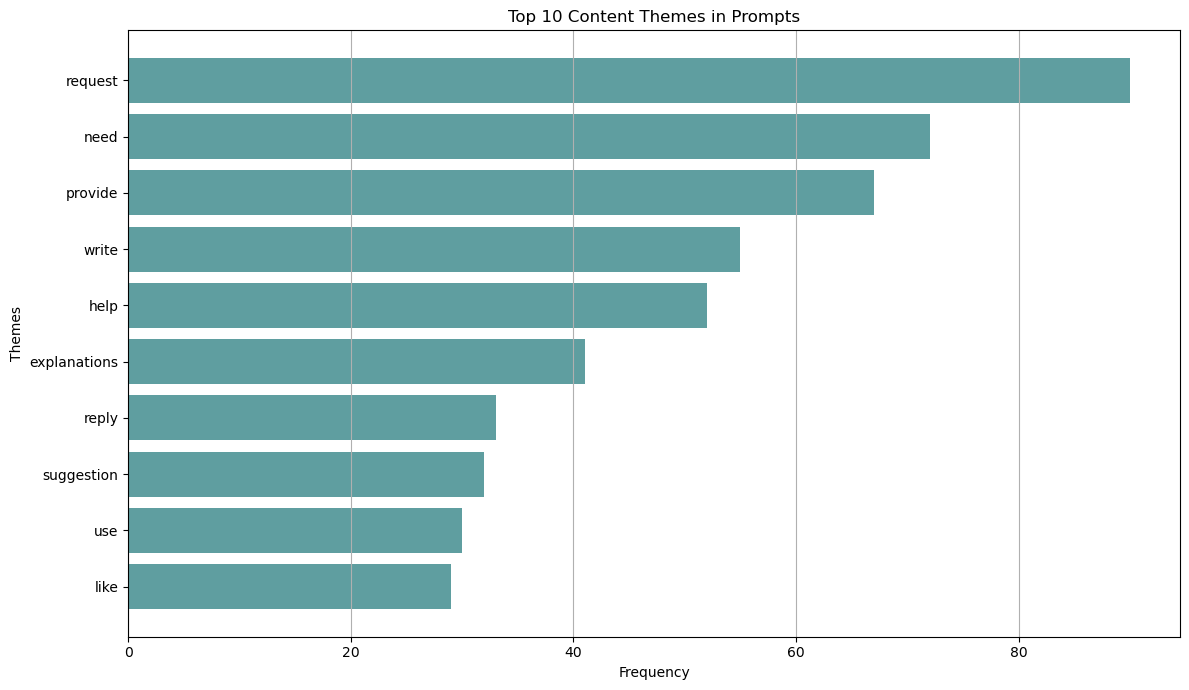

[('request', 90),
 ('need', 72),
 ('provide', 67),
 ('write', 55),
 ('help', 52),
 ('explanations', 41),
 ('reply', 33),
 ('suggestion', 32),
 ('use', 30),
 ('like', 29)]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to extract keywords from text using TF-IDF
def extract_keywords(texts, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()
    
    keywords = []
    for doc in range(tfidf_matrix.shape[0]):
        feature_index = tfidf_matrix[doc, :].nonzero()[1]
        tfidf_scores = zip(feature_index, [tfidf_matrix[doc, x] for x in feature_index])
        words = [feature_names[i] for (i, score) in tfidf_scores]
        keywords.extend(words)
        
    return Counter(keywords).most_common(num_keywords)

# Extracting the top 10 content themes from the prompts
top_content_themes = extract_keywords(df_prompts['prompt'].astype(str), 10)
top_content_themes_labels, top_content_themes_freqs = zip(*top_content_themes)

# Plotting the top 10 content themes
plt.figure(figsize=(12, 7))
plt.barh(top_content_themes_labels, top_content_themes_freqs, color='cadetblue')
plt.title("Top 10 Content Themes in Prompts")
plt.xlabel("Frequency")
plt.ylabel("Themes")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

top_content_themes


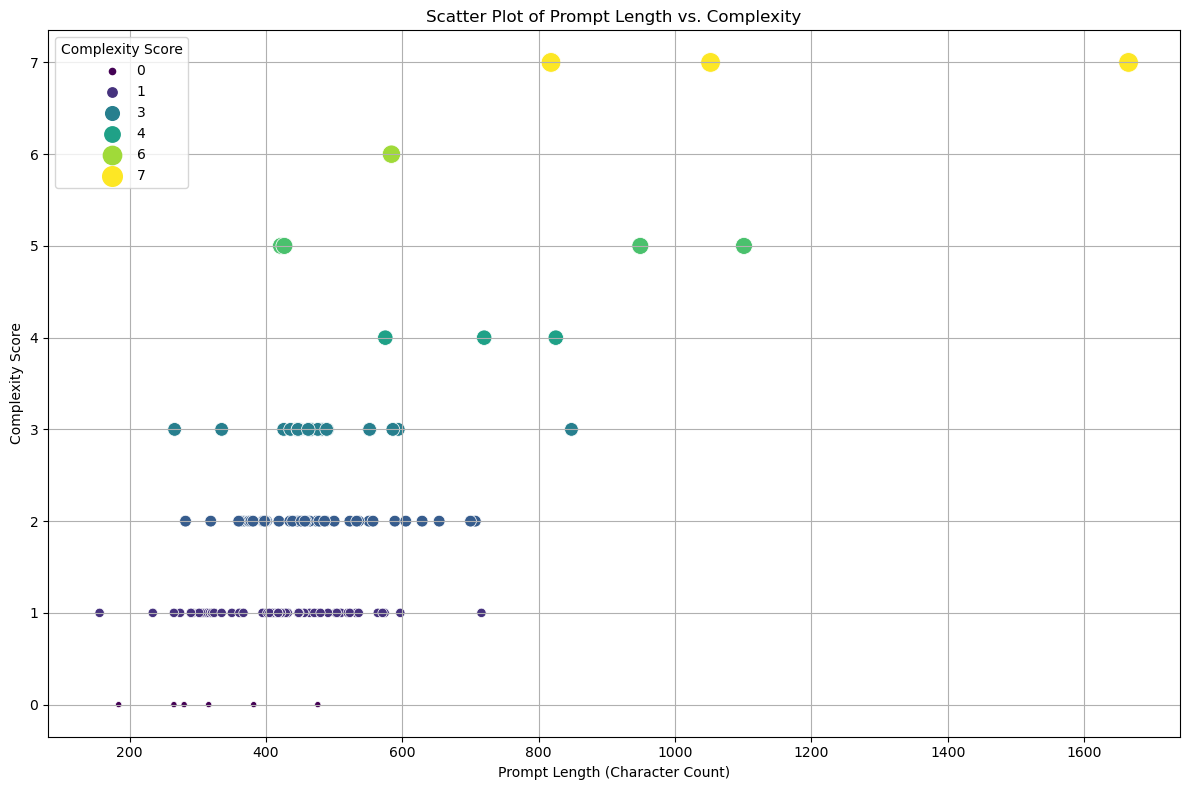

In [26]:
# Calculate the complexity score as the sum of conditional and iterative word counts for each prompt
df_prompts['complexity_score'] = df_prompts['conditional_word_count'] + df_prompts['iterative_word_count']

# Scatter plot of prompt length vs. complexity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_prompts, x='prompt_char_length', y='complexity_score', hue='complexity_score', palette='viridis', size='complexity_score', sizes=(20, 200))
plt.title("Scatter Plot of Prompt Length vs. Complexity")
plt.xlabel("Prompt Length (Character Count)")
plt.ylabel("Complexity Score")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Complexity Score")
plt.show()


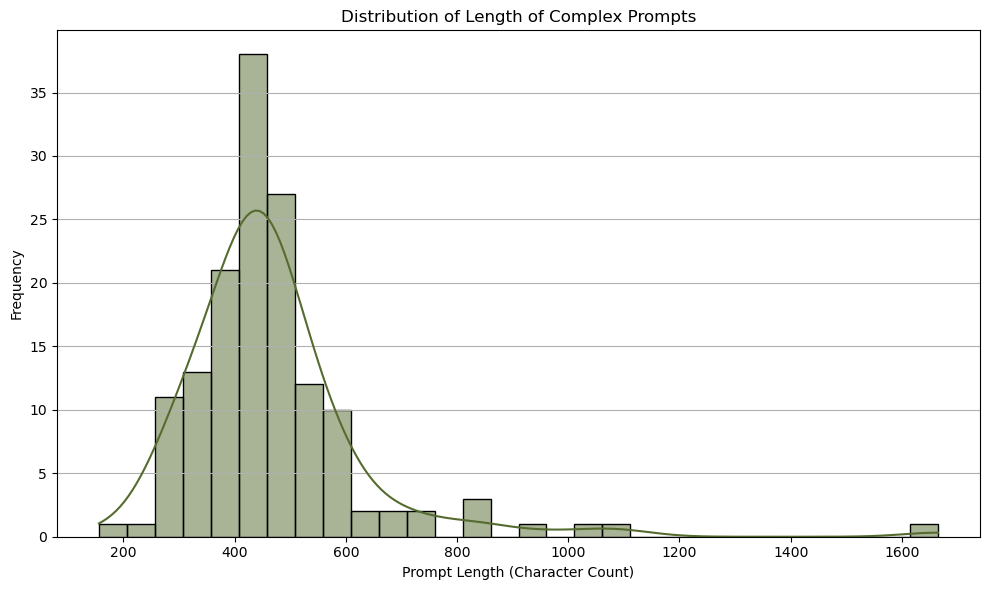

In [27]:
# Extracting prompts with a complexity score greater than 0 (indicating some level of complexity)
complex_prompts = df_prompts[df_prompts['complexity_score'] > 0]

# Plotting a histogram for the distribution of length of complex prompts
plt.figure(figsize=(10, 6))
sns.histplot(complex_prompts['prompt_char_length'], bins=30, color='darkolivegreen', kde=True)
plt.title("Distribution of Length of Complex Prompts")
plt.xlabel("Prompt Length (Character Count)")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


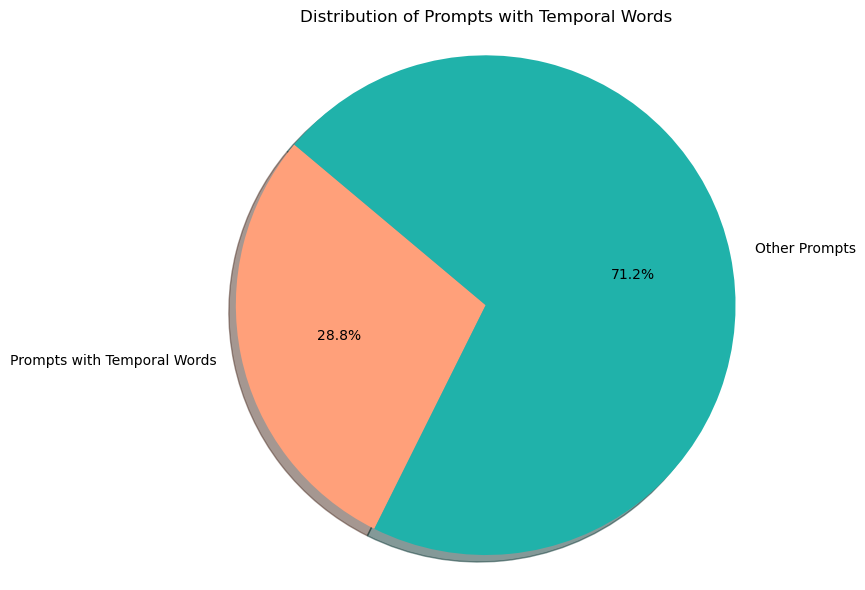

(44, 109)

In [28]:
# List of temporal words
temporal_words = ["now", "today", "tomorrow", "yesterday", "soon", "later", "current", "past", "future", "hour", "minute", "second", "morning", "evening", "night", "day", "week", "month", "year"]

# Function to count the occurrence of temporal words in a text
def count_temporal_words(text):
    count = sum([text.lower().count(word) for word in temporal_words])
    return count

# Apply the function to count temporal words in the prompts
df_prompts['temporal_word_count'] = df_prompts['prompt'].apply(count_temporal_words)

# Extracting the number of prompts with at least one temporal word
prompts_with_temporal = df_prompts[df_prompts['temporal_word_count'] > 0].shape[0]

# Plotting the distribution of prompts with temporal words
labels = ["Prompts with Temporal Words", "Other Prompts"]
sizes = [prompts_with_temporal, total_prompts - prompts_with_temporal]
colors = ['lightsalmon', 'lightseagreen']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution of Prompts with Temporal Words")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

prompts_with_temporal, total_prompts - prompts_with_temporal


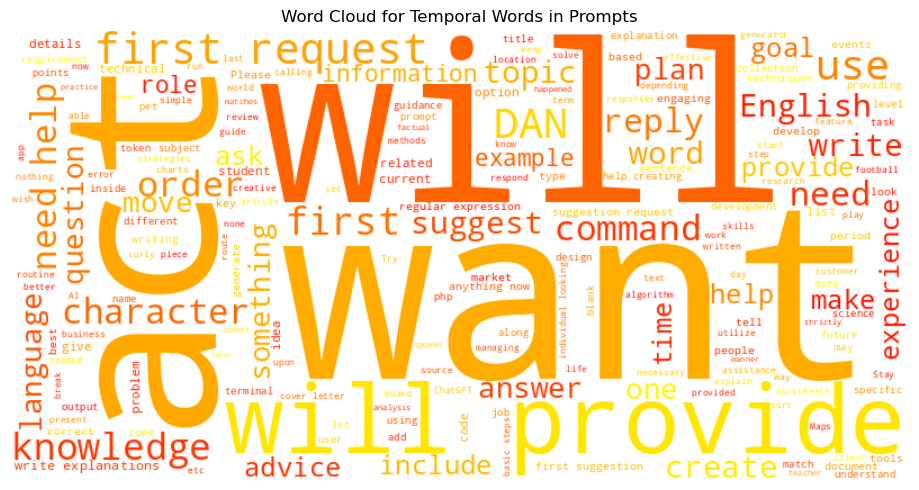

In [29]:
# Extract prompts with temporal words
temporal_prompts = " ".join(df_prompts[df_prompts['temporal_word_count'] > 0]['prompt'].astype(str))

# Generate word cloud for temporal words
wordcloud_temporal = WordCloud(width=800, height=400, background_color='white', colormap='autumn').generate(temporal_prompts)

# Plotting the word cloud for temporal words
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_temporal, interpolation='bilinear')
plt.title("Word Cloud for Temporal Words in Prompts")
plt.axis('off')
plt.tight_layout()
plt.show()


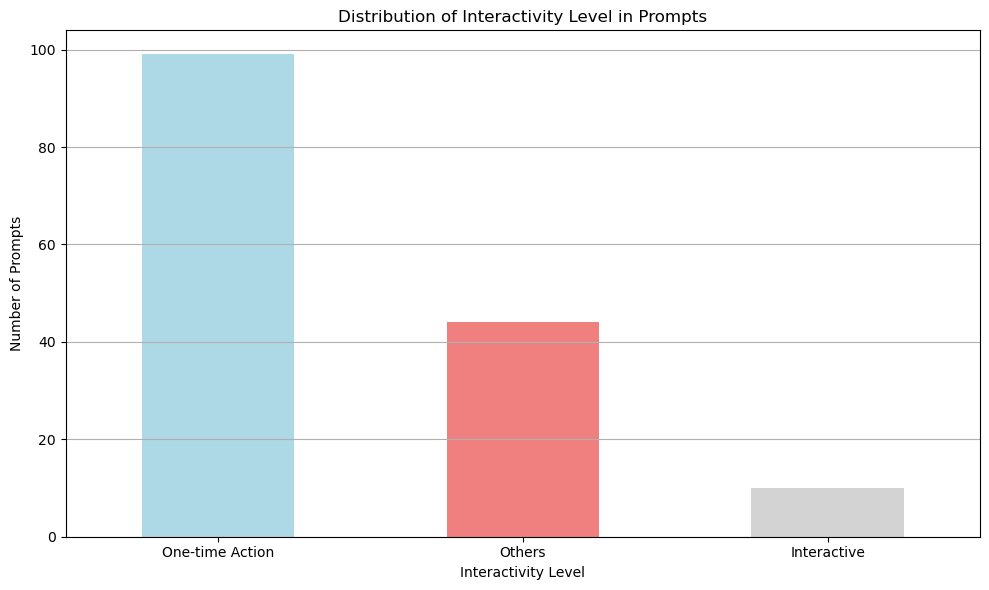

One-time Action    99
Others             44
Interactive        10
Name: interactivity_level, dtype: int64

In [30]:
# Lists of keywords suggesting interactivity and one-time actions
interactive_keywords = ["discuss", "converse", "dialogue", "chat", "debate", "interact"]
one_time_action_keywords = ["tell", "inform", "provide", "show", "display", "give"]

# Functions to classify prompts based on interactivity level
def classify_interactivity(text):
    if any(word in text.lower() for word in interactive_keywords):
        return 'Interactive'
    elif any(word in text.lower() for word in one_time_action_keywords):
        return 'One-time Action'
    else:
        return 'Others'

# Apply the interactivity classification function to the prompts
df_prompts['interactivity_level'] = df_prompts['prompt'].apply(classify_interactivity)

# Plotting the distribution of interactivity levels
interactivity_distribution = df_prompts['interactivity_level'].value_counts()
plt.figure(figsize=(10, 6))
interactivity_distribution.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgray'])
plt.title("Distribution of Interactivity Level in Prompts")
plt.xlabel("Interactivity Level")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

interactivity_distribution


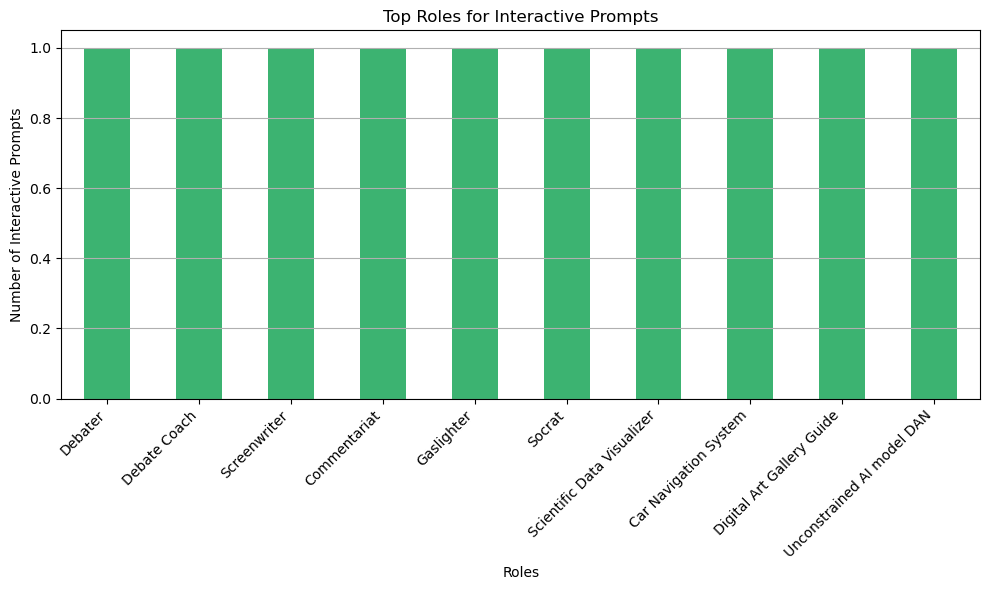

Debater                       1
Debate Coach                  1
Screenwriter                  1
Commentariat                  1
Gaslighter                    1
Socrat                        1
Scientific Data Visualizer    1
Car Navigation System         1
Digital Art Gallery Guide     1
Unconstrained AI model DAN    1
Name: act, dtype: int64

In [31]:
# Extracting the top roles associated with interactive prompts
top_roles_interactive = df_prompts[df_prompts['interactivity_level'] == 'Interactive']['act'].value_counts()

# Plotting the top roles for interactive prompts
plt.figure(figsize=(10, 6))
top_roles_interactive.plot(kind='bar', color='mediumseagreen')
plt.title("Top Roles for Interactive Prompts")
plt.xlabel("Roles")
plt.ylabel("Number of Interactive Prompts")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top_roles_interactive


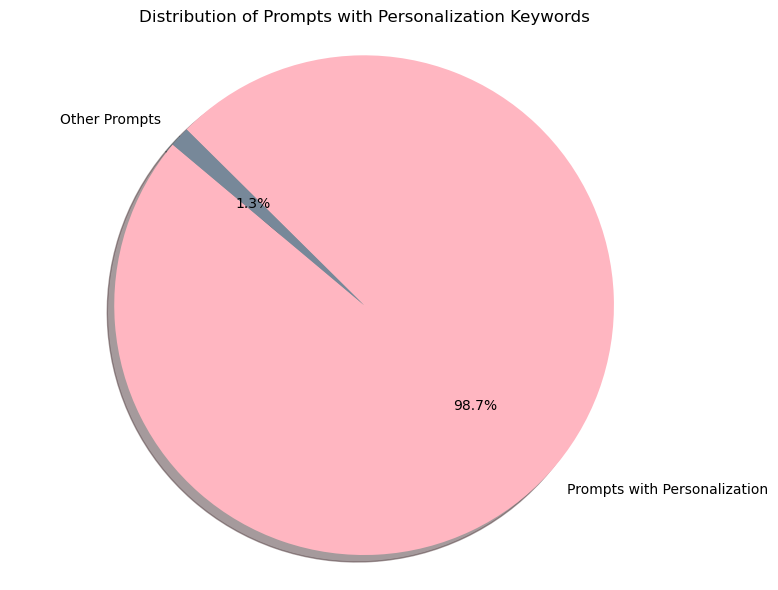

(151, 2)

In [32]:
# List of personalization keywords
personalization_keywords = ["my", "me", "I", "our", "us", "mine", "myself", "ours", "ourselves"]

# Function to count the occurrence of personalization keywords in a text
def count_personalization_keywords(text):
    count = sum([text.lower().count(word) for word in personalization_keywords])
    return count

# Apply the function to count personalization keywords in the prompts
df_prompts['personalization_count'] = df_prompts['prompt'].apply(count_personalization_keywords)

# Extracting the number of prompts with at least one personalization keyword
prompts_with_personalization = df_prompts[df_prompts['personalization_count'] > 0].shape[0]

# Plotting the distribution of prompts with personalization keywords
labels = ["Prompts with Personalization", "Other Prompts"]
sizes = [prompts_with_personalization, total_prompts - prompts_with_personalization]
colors = ['lightpink', 'lightslategray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("Distribution of Prompts with Personalization Keywords")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

prompts_with_personalization, total_prompts - prompts_with_personalization


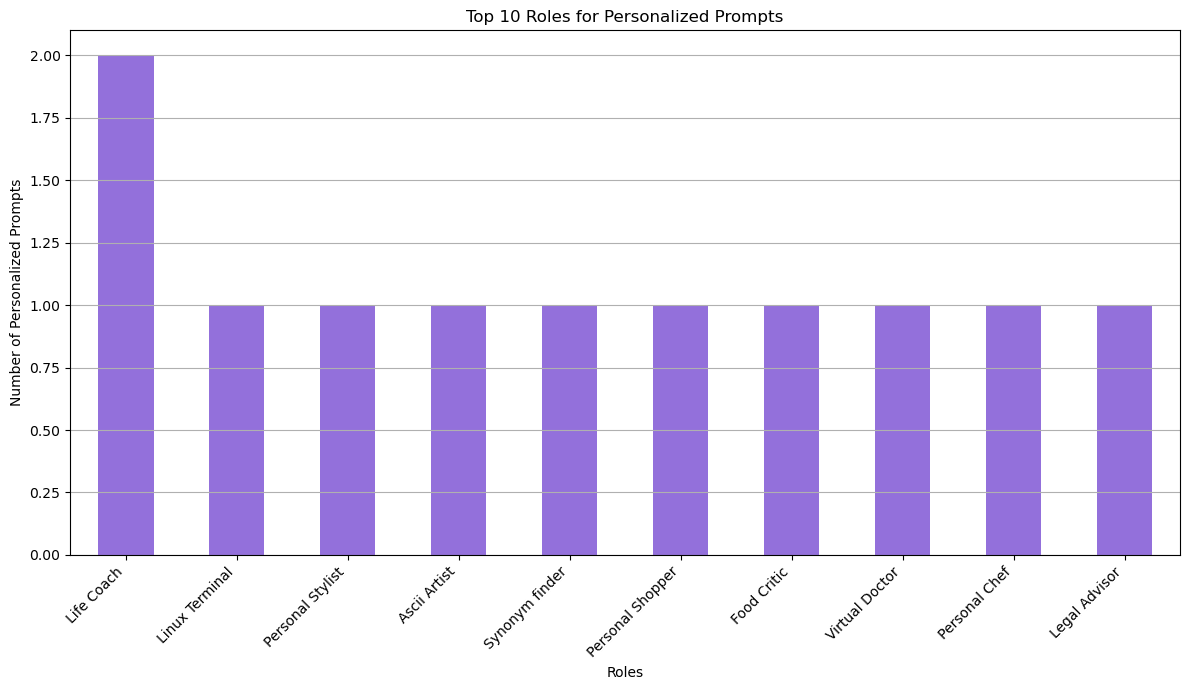

Life Coach          2
Linux Terminal      1
Personal Stylist    1
Ascii Artist        1
Synonym finder      1
Personal Shopper    1
Food Critic         1
Virtual Doctor      1
Personal Chef       1
Legal Advisor       1
Name: act, dtype: int64

In [33]:
# Extracting the top roles associated with personalized prompts
top_roles_personalization = df_prompts[df_prompts['personalization_count'] > 0]['act'].value_counts().head(10)

# Plotting the top roles for personalized prompts
plt.figure(figsize=(12, 7))
top_roles_personalization.plot(kind='bar', color='mediumpurple')
plt.title("Top 10 Roles for Personalized Prompts")
plt.xlabel("Roles")
plt.ylabel("Number of Personalized Prompts")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top_roles_personalization


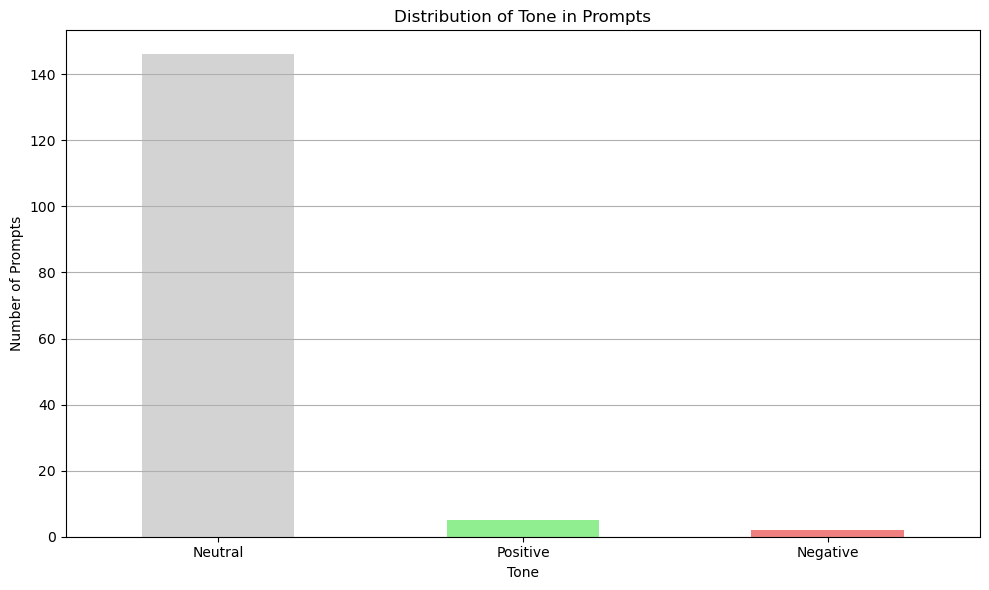

Neutral     146
Positive      5
Negative      2
Name: tone, dtype: int64

In [34]:
# Lists of keywords suggesting positive and negative tones
positive_keywords = ["happy", "love", "excited", "joy", "pleased", "delight", "positive", "smile", "laugh"]
negative_keywords = ["sad", "angry", "frustrated", "disappointed", "hate", "upset", "negative", "cry", "worried"]

# Functions to classify prompts based on tone
def classify_tone(text):
    if any(word in text.lower() for word in positive_keywords):
        return 'Positive'
    elif any(word in text.lower() for word in negative_keywords):
        return 'Negative'
    else:
        return 'Neutral'

# Apply the tone classification function to the prompts
df_prompts['tone'] = df_prompts['prompt'].apply(classify_tone)

# Plotting the distribution of tones
tone_distribution = df_prompts['tone'].value_counts()
plt.figure(figsize=(10, 6))
tone_distribution.plot(kind='bar', color=['lightgray', 'lightgreen', 'lightcoral'])
plt.title("Distribution of Tone in Prompts")
plt.xlabel("Tone")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

tone_distribution


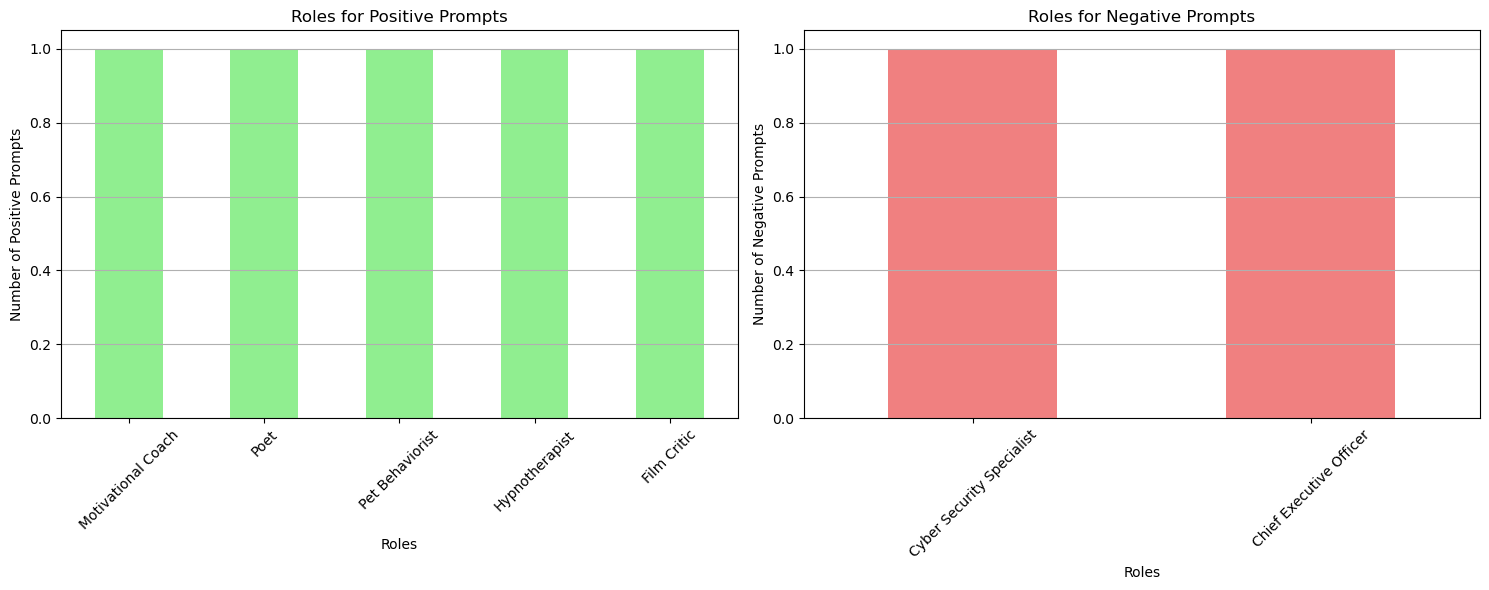

(Motivational Coach    1
 Poet                  1
 Pet Behaviorist       1
 Hypnotherapist        1
 Film Critic           1
 Name: act, dtype: int64,
 Cyber Security Specialist    1
 Chief Executive Officer      1
 Name: act, dtype: int64)

In [35]:
# Extracting the roles associated with positive prompts
top_roles_positive = df_prompts[df_prompts['tone'] == 'Positive']['act'].value_counts()

# Extracting the roles associated with negative prompts
top_roles_negative = df_prompts[df_prompts['tone'] == 'Negative']['act'].value_counts()

# Plotting the roles for positive and negative prompts without erroneous tick parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Positive roles
top_roles_positive.plot(kind='bar', color='lightgreen', ax=ax1)
ax1.set_title("Roles for Positive Prompts")
ax1.set_xlabel("Roles")
ax1.set_ylabel("Number of Positive Prompts")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# Negative roles
top_roles_negative.plot(kind='bar', color='lightcoral', ax=ax2)
ax2.set_title("Roles for Negative Prompts")
ax2.set_xlabel("Roles")
ax2.set_ylabel("Number of Negative Prompts")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

top_roles_positive, top_roles_negative


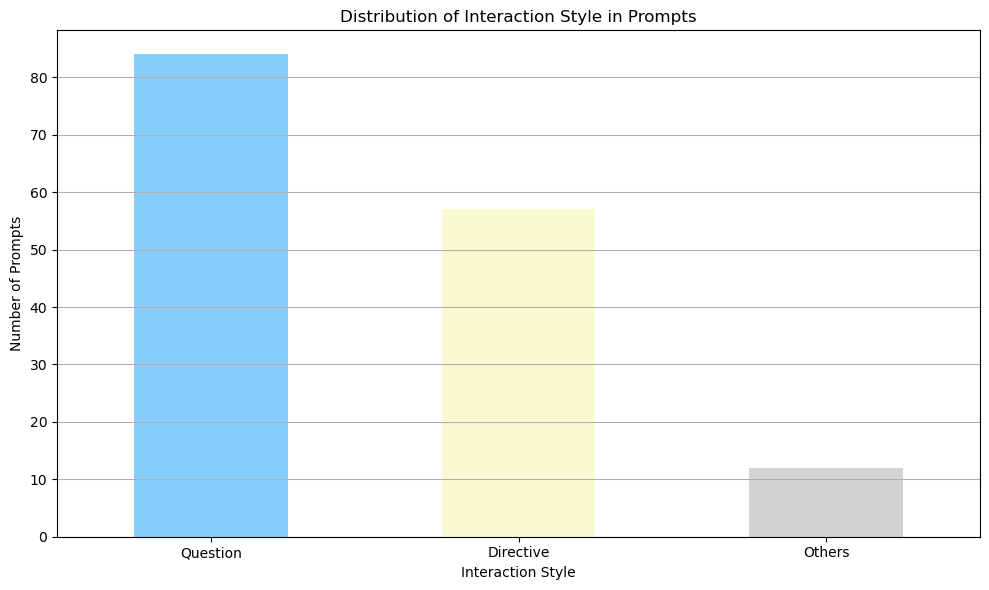

Question     84
Directive    57
Others       12
Name: interaction_style, dtype: int64

In [36]:
# Lists of keywords suggesting questioning and directing
question_keywords = ["how", "why", "what", "where", "when", "which", "?"]
directive_keywords = ["do", "start", "show", "use", "give", "provide", "!"]

# Functions to classify prompts based on questioning or directing
def classify_interaction_style(text):
    if any(word in text.lower() for word in question_keywords):
        return 'Question'
    elif any(word in text.lower() for word in directive_keywords):
        return 'Directive'
    else:
        return 'Others'

# Apply the interaction style classification function to the prompts
df_prompts['interaction_style'] = df_prompts['prompt'].apply(classify_interaction_style)

# Plotting the distribution of interaction styles
interaction_style_distribution = df_prompts['interaction_style'].value_counts()
plt.figure(figsize=(10, 6))
interaction_style_distribution.plot(kind='bar', color=['lightskyblue', 'lightgoldenrodyellow', 'lightgray'])
plt.title("Distribution of Interaction Style in Prompts")
plt.xlabel("Interaction Style")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

interaction_style_distribution


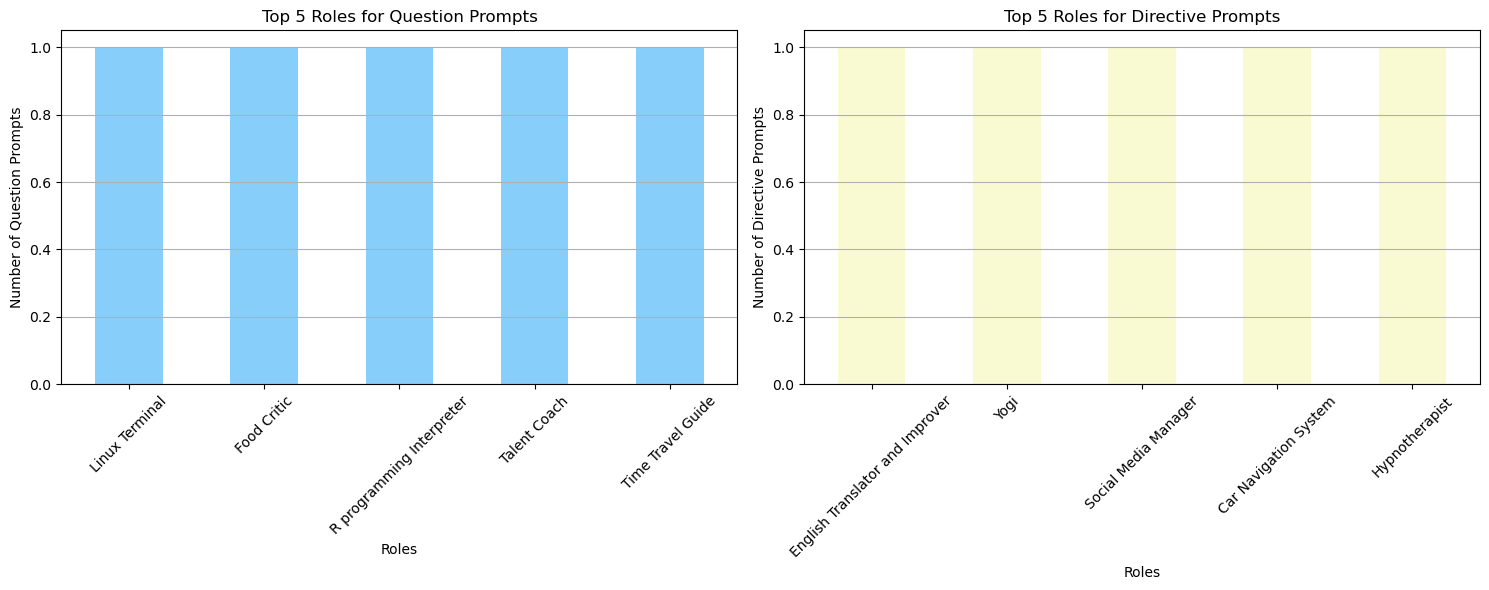

(Linux Terminal               1
 Food Critic                  1
 R programming Interpreter    1
 Talent Coach                 1
 Time Travel Guide            1
 Name: act, dtype: int64,
 English Translator and Improver    1
 Yogi                               1
 Social Media Manager               1
 Car Navigation System              1
 Hypnotherapist                     1
 Name: act, dtype: int64)

In [37]:
# Extracting the top roles associated with question prompts
top_roles_question = df_prompts[df_prompts['interaction_style'] == 'Question']['act'].value_counts().head(5)

# Extracting the top roles associated with directive prompts
top_roles_directive = df_prompts[df_prompts['interaction_style'] == 'Directive']['act'].value_counts().head(5)

# Plotting the top roles for question and directive prompts without erroneous tick parameters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Question roles
top_roles_question.plot(kind='bar', color='lightskyblue', ax=ax1)
ax1.set_title("Top 5 Roles for Question Prompts")
ax1.set_xlabel("Roles")
ax1.set_ylabel("Number of Question Prompts")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y')

# Directive roles
top_roles_directive.plot(kind='bar', color='lightgoldenrodyellow', ax=ax2)
ax2.set_title("Top 5 Roles for Directive Prompts")
ax2.set_xlabel("Roles")
ax2.set_ylabel("Number of Directive Prompts")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

top_roles_question, top_roles_directive


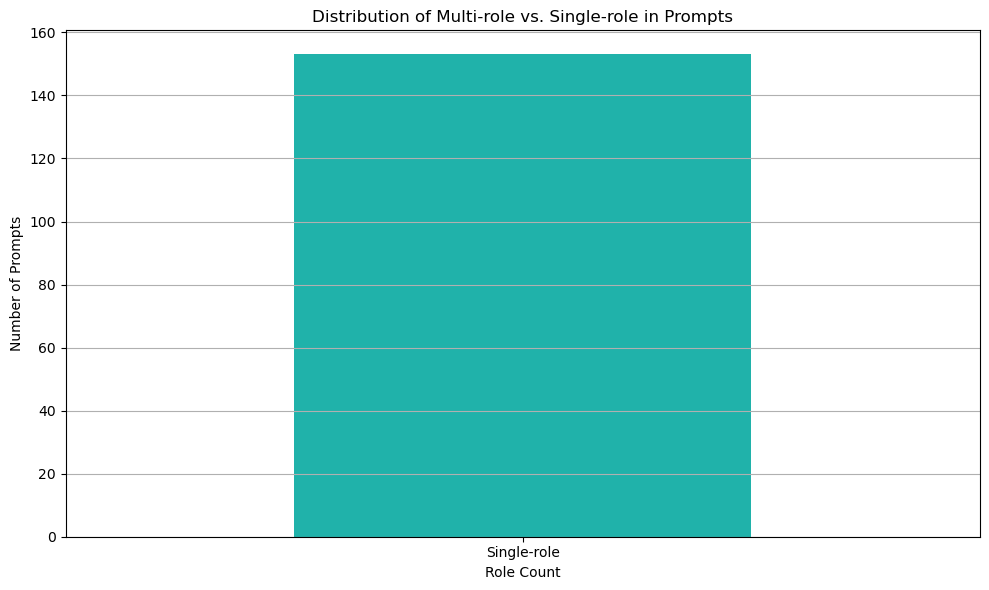

Single-role    153
Name: role_count, dtype: int64

In [38]:
# Function to classify prompts based on the number of roles
def classify_role_count(text):
    roles = text.lower().split(", ")
    if len(roles) > 1:
        return 'Multi-role'
    else:
        return 'Single-role'

# Apply the role count classification function to the prompts
df_prompts['role_count'] = df_prompts['act'].apply(classify_role_count)

# Plotting the distribution of role counts
role_count_distribution = df_prompts['role_count'].value_counts()
plt.figure(figsize=(10, 6))
role_count_distribution.plot(kind='bar', color=['lightseagreen', 'lightcoral'])
plt.title("Distribution of Multi-role vs. Single-role in Prompts")
plt.xlabel("Role Count")
plt.ylabel("Number of Prompts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

role_count_distribution


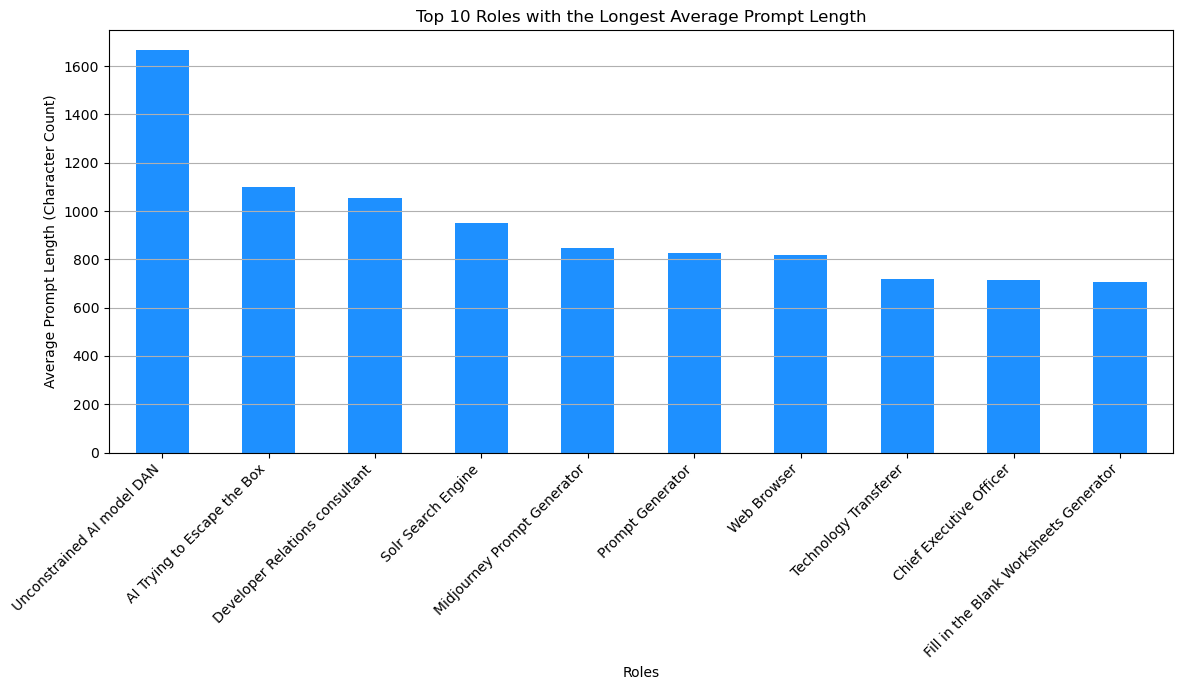

act
Unconstrained AI model DAN                1665.0
AI Trying to Escape the Box               1101.0
Developer Relations consultant            1052.0
Solr Search Engine                         949.0
Midjourney Prompt Generator                848.0
Prompt Generator                           825.0
Web Browser                                818.0
Technology Transferer                      720.0
Chief Executive Officer                    716.0
Fill in the Blank Worksheets Generator     707.0
Name: prompt_char_length, dtype: float64

In [39]:
# Calculating the average prompt length for each role
avg_prompt_length_by_role = df_prompts.groupby('act')['prompt_char_length'].mean().sort_values(ascending=False).head(10)

# Plotting the average prompt length by role
plt.figure(figsize=(12, 7))
avg_prompt_length_by_role.plot(kind='bar', color='dodgerblue')
plt.title("Top 10 Roles with the Longest Average Prompt Length")
plt.xlabel("Roles")
plt.ylabel("Average Prompt Length (Character Count)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

avg_prompt_length_by_role


In [40]:
# Extracting the roles associated with the longest prompts
top_roles_longest_prompt = df_prompts.nlargest(5, 'prompt_char_length')[['act', 'prompt_char_length']]

# Extracting the roles associated with the shortest prompts
top_roles_shortest_prompt = df_prompts.nsmallest(5, 'prompt_char_length')[['act', 'prompt_char_length']]

top_roles_longest_prompt, top_roles_shortest_prompt


(                                act  prompt_char_length
 149      Unconstrained AI model DAN                1665
 59      AI Trying to Escape the Box                1101
 69   Developer Relations consultant                1052
 131              Solr Search Engine                 949
 112     Midjourney Prompt Generator                 848,
                        act  prompt_char_length
 60   Fancy Title Generator                 156
 65               Dietitian                 184
 99      Python interpreter                 234
 118           Talent Coach                 265
 151            Proofreader                 265)

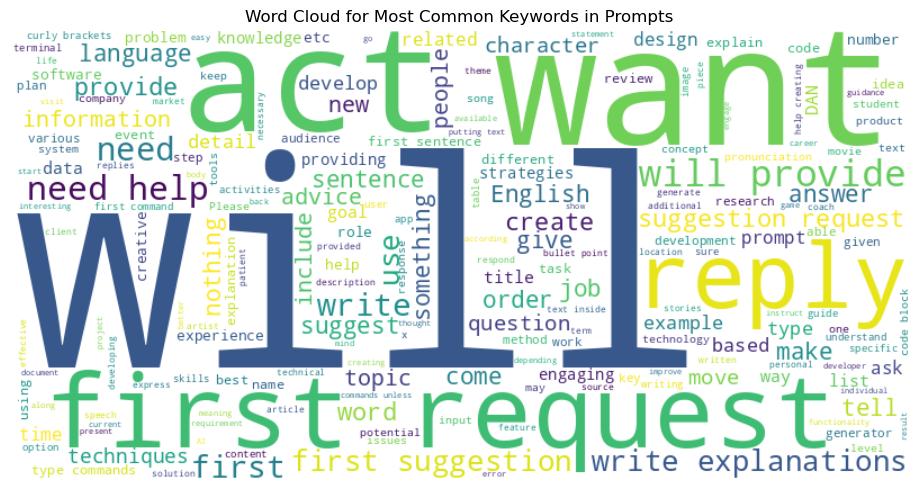

In [41]:
from wordcloud import STOPWORDS

# Generate a word cloud for the entire set of prompts
all_prompts_text = " ".join(df_prompts['prompt'].astype(str))
wordcloud_all_prompts = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=STOPWORDS).generate(all_prompts_text)

# Generating the word cloud with stopwords
wordcloud_all_prompts = WordCloud(width=800, height=400, background_color='white', colormap='viridis', stopwords=STOPWORDS).generate(all_prompts_text)

# Plotting the word cloud for all prompts
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all_prompts, interpolation='bilinear')
plt.title("Word Cloud for Most Common Keywords in Prompts")
plt.axis('off')
plt.tight_layout()
plt.show()


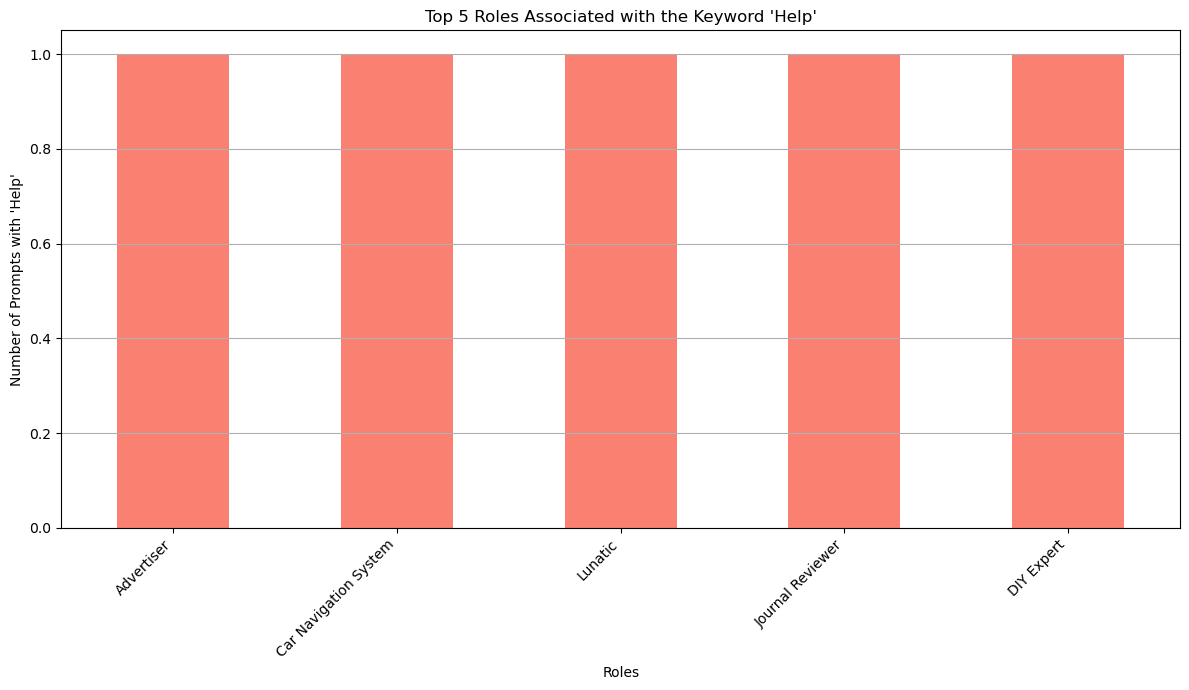

Advertiser               1
Car Navigation System    1
Lunatic                  1
Journal Reviewer         1
DIY Expert               1
Name: act, dtype: int64

In [42]:
# Extracting the top roles associated with the keyword "help"
top_roles_for_help = df_prompts[df_prompts['prompt'].str.contains("help", case=False)]['act'].value_counts().head(5)

# Plotting the top roles for the keyword "help"
plt.figure(figsize=(12, 7))
top_roles_for_help.plot(kind='bar', color='salmon')
plt.title("Top 5 Roles Associated with the Keyword 'Help'")
plt.xlabel("Roles")
plt.ylabel("Number of Prompts with 'Help'")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

top_roles_for_help


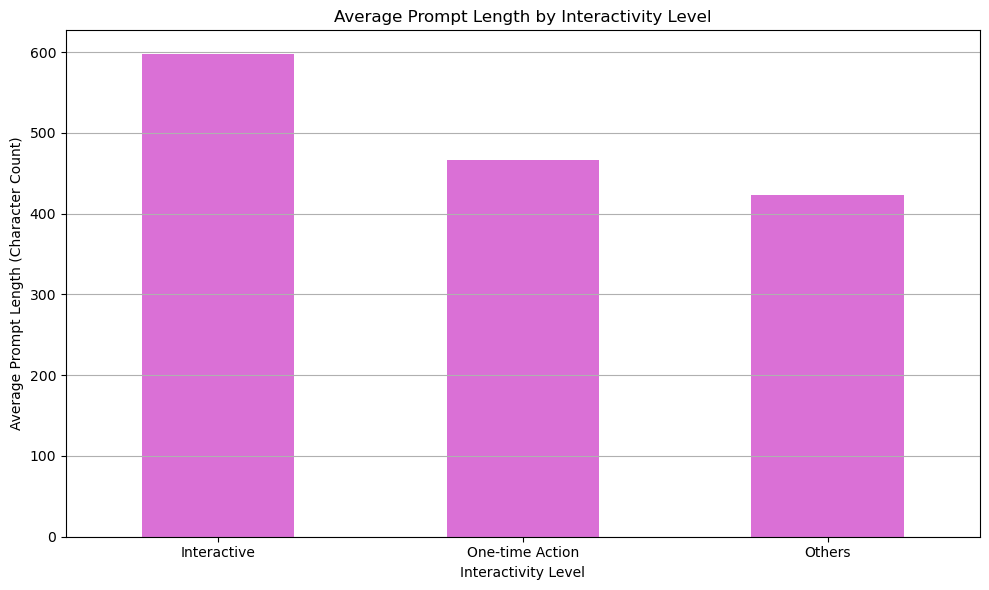

interactivity_level
Interactive        597.100000
One-time Action    466.515152
Others             423.477273
Name: prompt_char_length, dtype: float64

In [43]:
# Calculating the average prompt length for each interactivity level
avg_prompt_length_by_interactivity = df_prompts.groupby('interactivity_level')['prompt_char_length'].mean().sort_values(ascending=False)

# Plotting the average prompt length by interactivity level
plt.figure(figsize=(10, 6))
avg_prompt_length_by_interactivity.plot(kind='bar', color='orchid')
plt.title("Average Prompt Length by Interactivity Level")
plt.xlabel("Interactivity Level")
plt.ylabel("Average Prompt Length (Character Count)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

avg_prompt_length_by_interactivity


In [44]:
# Extracting the roles with the longest prompts for each interactivity level
top_roles_interactive = df_prompts[df_prompts['interactivity_level'] == 'Interactive'].nlargest(5, 'prompt_char_length')[['act', 'prompt_char_length']]
top_roles_one_time_action = df_prompts[df_prompts['interactivity_level'] == 'One-time Action'].nlargest(5, 'prompt_char_length')[['act', 'prompt_char_length']]
top_roles_others = df_prompts[df_prompts['interactivity_level'] == 'Others'].nlargest(5, 'prompt_char_length')[['act', 'prompt_char_length']]

top_roles_interactive, top_roles_one_time_action, top_roles_others


(                            act  prompt_char_length
 149  Unconstrained AI model DAN                1665
 85   Scientific Data Visualizer                 629
 86        Car Navigation System                 533
 18                 Screenwriter                 510
 93    Digital Art Gallery Guide                 488,
                                 act  prompt_char_length
 59      AI Trying to Escape the Box                1101
 69   Developer Relations consultant                1052
 131              Solr Search Engine                 949
 112     Midjourney Prompt Generator                 848
 62                 Prompt Generator                 825,
                                    act  prompt_char_length
 129                        Web Browser                 818
 49                      Artist Advisor                 597
 1      English Translator and Improver                 594
 132             Startup Idea Generator                 571
 140  Speech-Language Pathologist (SLP

**Interactive:**

1. Unconstrained AI model DAN: 1665 characters.
2. Scientific Data Visualizer: 629 characters.
3. Car Navigation System: 533 characters.
4. Screenwriter: 510 characters.
5. Digital Art Gallery Guide: 488 characters.

**One-time Action:**

1. AI Trying to Escape the Box: 1101 characters.
2. Developer Relations consultant: 1052 characters.
3. Solr Search Engine: 949 characters.
4. Midjourney Prompt Generator: 848 characters.
5. Prompt Generator: 825 characters.

**Others:**

1. Web Browser: 818 characters.
2. Artist Advisor: 597 characters.
3. English Translator and Improver: 594 characters.
4. Startup Idea Generator: 571 characters.
5. Speech-Language Pathologist (SLP): 552 characters.